In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#collection of data
#loading data set into the dataframe
td=pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
td.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
#printing sample data
td.sample(10)

PassengerId  Survived  Pclass  \
406          407         0       3   
839          840         1       1   
101          102         0       3   
502          503         0       3   
165          166         1       3   
672          673         0       2   
156          157         1       3   
435          436         1       1   
683          684         0       3   
306          307         1       1   

                                                Name     Sex   Age  SibSp  \
406                 Widegren, Mr. Carl/Charles Peter    male  51.0      0   
839                             Marechal, Mr. Pierre    male   NaN      0   
101                 Petroff, Mr. Pastcho ("Pentcho")    male   NaN      0   
502                   O'Sullivan, Miss. Bridget Mary  female   NaN      0   
165  Goldsmith, Master. Frank John William "Frankie"    male   9.0      0   
672                      Mitchell, Mr. Henry Michael    male  70.0      0   
156                 Gilnagh, Miss. Katherine "Katie"  female  16.0      0   
435                        Carter, Miss. Lucile Polk  female  14.0      1   
683                      Goodwin, Mr. Charles Edward    male  14.0      5   
306                          Fleming, Miss. Margaret  female   NaN      0   

     Parch      Ticket      Fare    Cabin Embarked  
406      0      347064    7.7500      NaN        S  
839      0       11774   29.7000      C47        C  
101      0      349215    7.8958      NaN        S  
502      0      330909    7.6292      NaN        Q  
165      2      363291   20.5250      NaN        S  
672      0  C.A. 24580   10.5000      NaN        S  
156      0       35851    7.7333      NaN        Q  
435      2      113760  120.0000  B96 B98        S  
683      2     CA 2144   46.9000      NaN        S  
306      0       17421  110.8833      NaN        C

**Survived** columns has values 0 and 1
0-no
1-survived
**pclass** reprsents the class of the compartment
1st , 2nd ,3rd
**sibsp **related to no of siblings/spouses aboard the Titanic
**parch** -parents/children
**ticket**-ticket number
**cabin**-cabin number
**embarked**-Port of embarked
c-cherbourg , Q-Queendtone, S-southampton


In [5]:
#getting information from dataset
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info gives column anme,non null value counts and datatype

In [6]:
td.shape

(891, 12)

In [7]:
td.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
#checking no of missing values in each column

In [9]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here the **age** column has **177 **missing values and **embarked** has **2** missing values and **cabin** has **687 **missing values.

Handling missing values

In [10]:
#Here in cabin column we have more tha nhalf of the values missing so we drop the cabin column from the dataset.
td=td.drop(columns='Cabin',axis=1)

In [11]:
td.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

Now cabin column deleted

In [12]:
#now replacing the missing values with mean
td['Age'].fillna(td['Age'].mean(),inplace=True)


In [13]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
#for embarked we use mode because we replace the most repeated values solets find most repeated value
td['Embarked'].mode()


0    S
Name: Embarked, dtype: object

In [15]:
td['Embarked'].mode()[0]


'S'

In [16]:
td['Embarked'].fillna(td['Embarked'].mode()[0],inplace=True)

In [17]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [18]:
td['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Visuliasation

<Axes: xlabel='Survived', ylabel='count'>

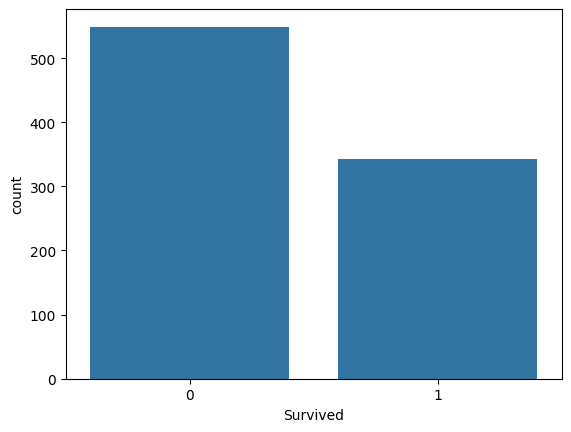

In [19]:
#making count plot for survived column
sns.countplot(x='Survived',data=td)

In [20]:
td['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

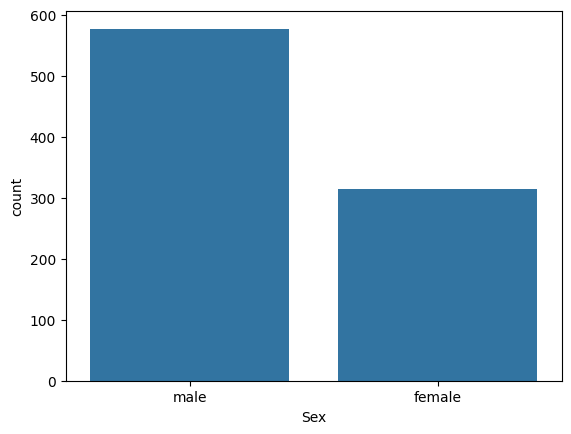

In [21]:
sns.countplot(x='Sex',data=td)

In [22]:
td['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

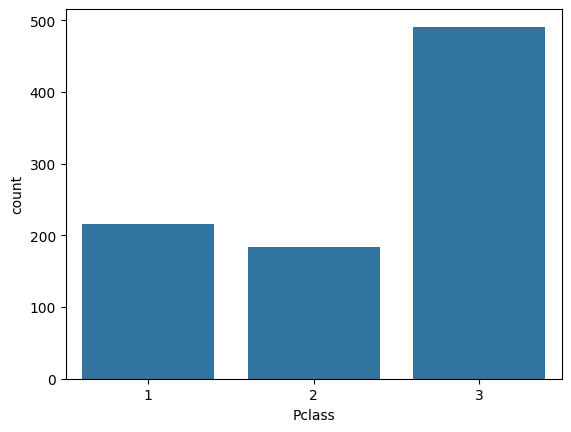

In [23]:
sns.countplot(x='Pclass',data=td)

In [24]:
td['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [25]:
td['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

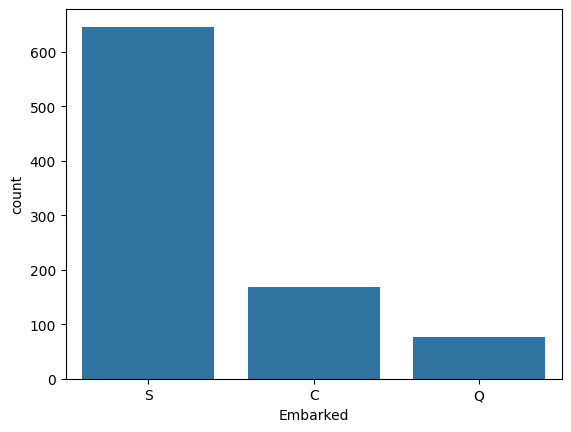

In [26]:
sns.countplot(x='Embarked',data=td)

<Axes: xlabel='Sex', ylabel='count'>

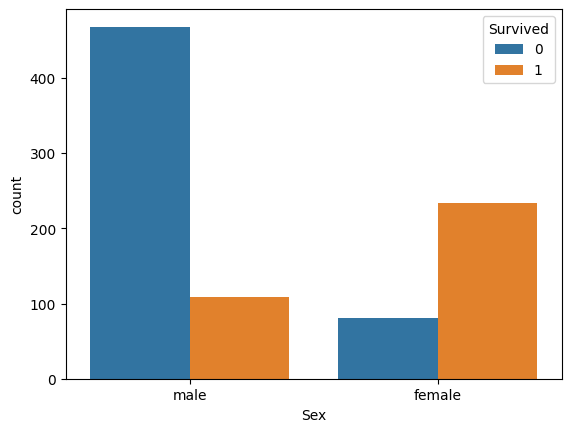

In [27]:
#compare survival and gender
sns.countplot(x='Sex',hue='Survived',data=td)

<Axes: xlabel='Pclass', ylabel='count'>

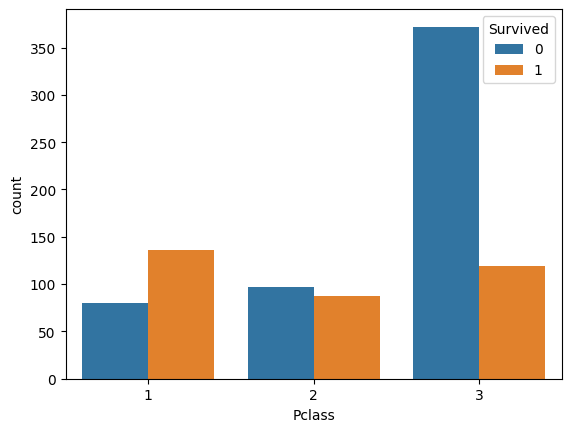

In [28]:
#based on Pclass
sns.countplot(x='Pclass',hue='Survived',data=td)

<Axes: xlabel='Embarked', ylabel='count'>

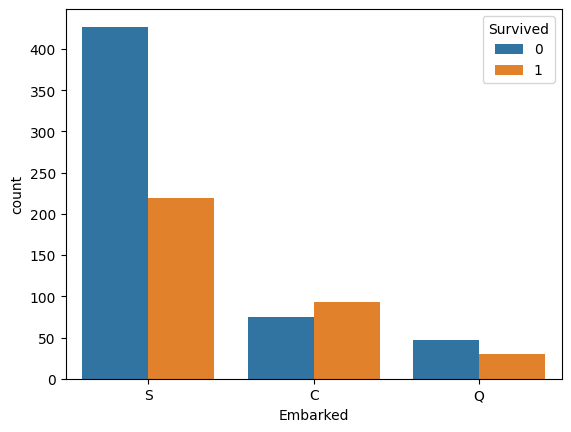

In [29]:
#base on Embarked
sns.countplot(x='Embarked',hue='Survived',data=td)

In [30]:
#here sex have text format so we need change data type
td.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [31]:
td.sample()

PassengerId  Survived  Pclass                    Name  Sex   Age  SibSp  \
86           87         0       3  Ford, Mr. William Neal    0  16.0      1   

    Parch      Ticket    Fare  Embarked  
86      3  W./C. 6608  34.375         0

In [32]:
X=td.drop(columns={'Survived','Ticket','Name'})

In [33]:
Y=td['Survived']
print(X)
print(Y)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500         0
1              2       1    1  38.000000      1      0  71.2833         1
2              3       3    1  26.000000      0      0   7.9250         0
3              4       1    1  35.000000      1      0  53.1000         0
4              5       3    0  35.000000      0      0   8.0500         0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000         0
887          888       1    1  19.000000      0      0  30.0000         0
888          889       3    1  29.699118      1      2  23.4500         0
889          890       1    0  26.000000      0      0  30.0000         1
890          891       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
model1=LogisticRegression()

In [36]:
model1.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
X_train_prediction=model1.predict(X_train)

In [38]:
X_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [39]:
score_train=accuracy_score(Y_train,X_train_prediction)

In [40]:
score_train

0.8160112359550562

In [41]:
X_test_prediction=model1.predict(X_test)

In [42]:
X_test_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [43]:
score_test=accuracy_score(Y_test,X_test_prediction)

In [44]:
score_test

0.776536312849162

In [45]:
model2 = DecisionTreeClassifier()

In [46]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [47]:
X_prediction=model2.predict(X_train)

In [48]:
X_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [49]:
score=accuracy_score(Y_train,X_prediction)

In [50]:
score

1.0

In [51]:
X_test_prediction=model2.predict(X_test)

In [52]:
score2=accuracy_score(Y_test,X_test_prediction)

In [53]:
score2

0.770949720670391

In [54]:
# so we choose Logistic Regeression

